In [1]:
# to delete, moved to requirement.txt
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Extraction des données

In [3]:
source = DataSource("./../data.json")

dataframe_list = source.filter([["WC"], ["M"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)


len(athletes_data)

126

# Création d'un DataFrame utilisable pour le clustering

In [4]:
df_athletes = extractor.create_dataframe_clustering(
    athletes_data=athletes_data,
    exceptions=["air_points", "ski_base", "ski_deduction_total", "total_points", "top_air_execution", "bottom_air_execution"],
)
df_athletes

,ski_points,time_points,top_air_points,bottom_air_points
TADE Marco,0.444073,0.353593,0.403999,0.293976
MAKHNEV Andrei,0.345182,0.725646,0.231029,0.446197
MOBERG Elis,0.588400,0.646123,0.723440,0.600421
CHUNLAUD Kerrian,0.347855,0.339392,0.364972,0.519303
LAVOIE Alexandre,0.448082,0.541750,0.351602,0.137750
...,...,...,...,...
ESCOBAR Jules,0.513564,0.480451,0.207420,0.362075
VARGA Maxence,0.569691,0.844930,0.338954,0.684543
BOURDETTE Marius,0.538030,0.350971,0.516409,0.663512
SALONEN Jimi,0.373246,0.187624,0.298482,0.312566


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

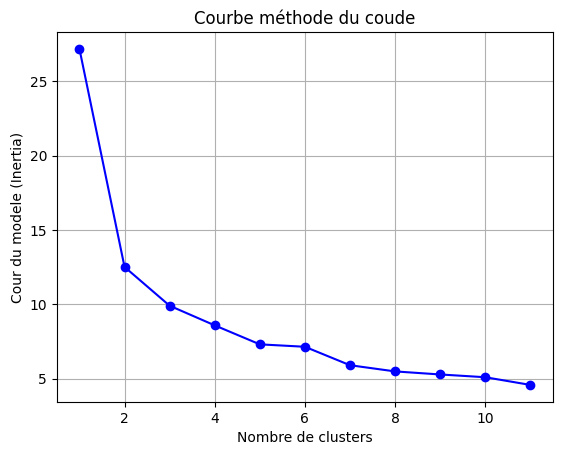

In [5]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker="o", color="blue")
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")
plt.title("Courbe méthode du coude")
plt.grid(1)
plt.show()

# Nettoyage des données (enlever anomalies)

In [6]:
clean_model = IsolationForest(contamination=0.01)
clean_model.fit(df_athletes)
plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))

KeyError: 'air_points'

# Clustering sur les données

In [10]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
df_athletes["cluster"] = model.fit_predict(df_athletes)
model.cluster_centers_

array([[ 5.24439697e-01,  4.96746005e-01,  3.94110916e-01,
         4.04464172e-01,  2.00000000e+00, -4.83604128e-02,
         2.59545266e-02],
       [ 7.42522252e-01,  7.50493167e-01,  6.79779269e-01,
         6.79796058e-01,  8.88178420e-16,  4.68995735e-01,
         2.63398151e-03],
       [ 2.78455338e-01,  2.67599490e-01,  2.35249039e-01,
         2.54114809e-01,  1.00000000e+00, -4.39249068e-01,
        -3.13156598e-02]])

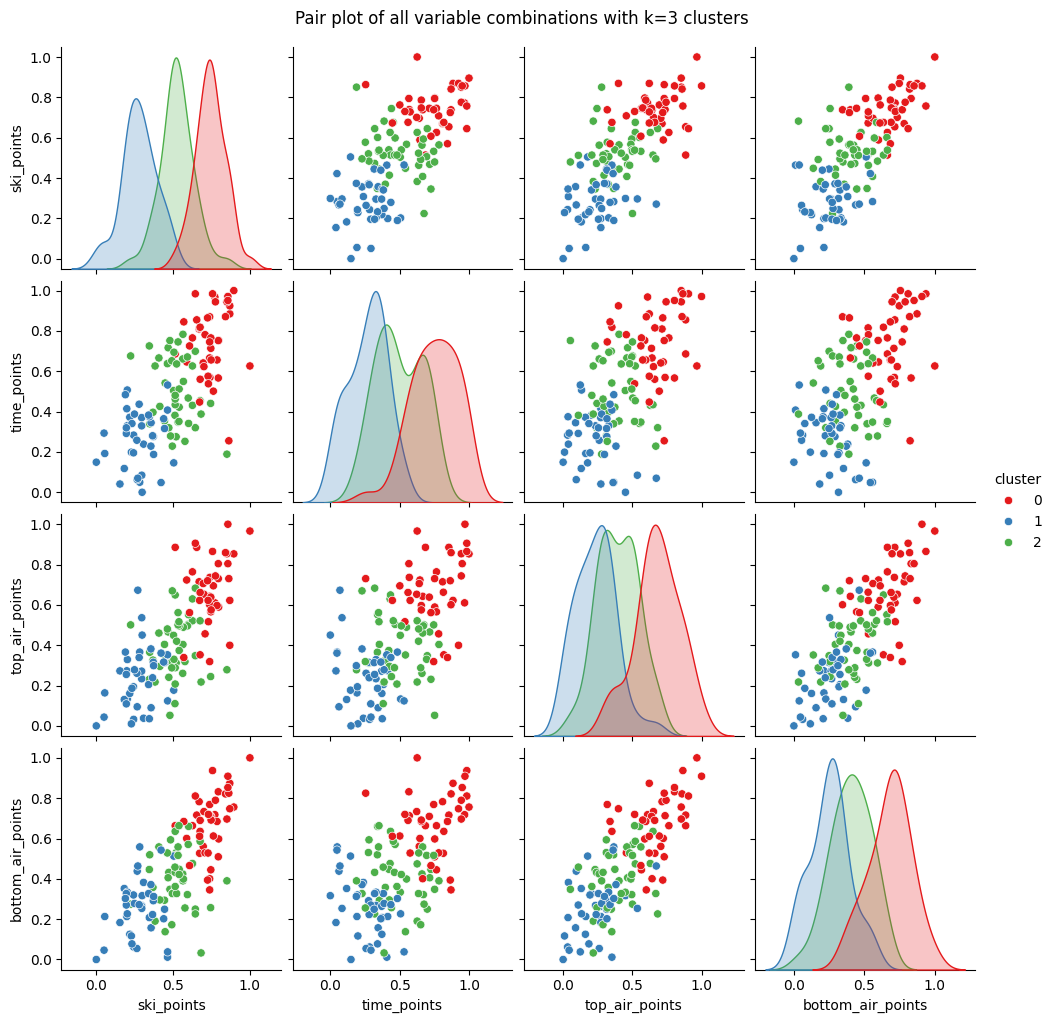

In [8]:
sns.pairplot(df_athletes, hue="cluster", palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

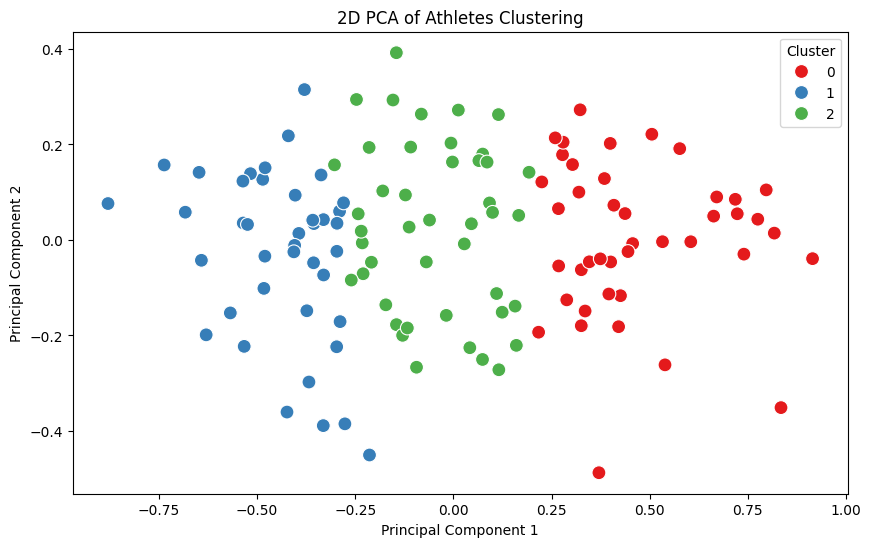

In [9]:
df_athletes_second = df_athletes.drop("cluster", axis=1)

reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes_second)

df_athletes["PCA1"] = athletes_reduced[:, 0]
df_athletes["PCA2"] = athletes_reduced[:, 1]

# Visualisation des clusters dans le nouvel espace 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_athletes, x="PCA1", y="PCA2", hue="cluster", palette="Set1", s=100)

# Ajout de titres et labels
plt.title("2D PCA of Athletes Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
reduct_model.components_

array([[ 0.45710436,  0.36358912,  0.20976454,  0.17964689, -0.31803184,
         0.28015641,  0.30616717,  0.36443332,  0.42000302],
       [-0.44858691,  0.24958981,  0.00448004, -0.05070042,  0.50730555,
         0.47528732,  0.49984771, -0.02364346,  0.01484597]])